<a href="https://colab.research.google.com/github/aditya8075/CUSTOMER-SEGMENTATION---CLUSTURING-CAPSTON-PROJECT/blob/main/Customer_segmentation_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [354]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [356]:
#loading and reading dataset
data=pd.read_csv('/content/drive/MyDrive/customer segmentation csv.csv',encoding= 'unicode_escape')

In [357]:
#observing first 5 records which are present in our dataset
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [358]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [359]:
# Statistical description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## DATA CLEANING

In [360]:
#Finding Shape of matrix
data.shape

(541909, 8)

In [361]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

From above we can see that there are some null values present in two columns one is Description and Other is Customer ID. We need to drop that missing values because we dont have any strategies or intution for filling those missing values.

In [362]:
#Dropping null values in dataset
data.dropna(inplace=True)

In [363]:
data.shape

(406829, 8)

In [364]:
# Total null values in each of the columns
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Soo now all the null values has been dropped and we loss around 135080 recorrds for dropping that null values.

In [365]:
# Number of unique products in the dataset
data['Description'].nunique()

3896

Conclusion 

1. There are 3896 unique product are present in dataset.

In [366]:
# Converting Customer ID column from float type to int type
data['CustomerID'] = data['CustomerID'].apply(int)

There are some orders that are cancelled We Need to drop that records because this record are not nessesary for clustering also they affect dataset while forming clusters.

In [367]:
# Converting the column to a string type to detect 'C'
data['InvoiceNo'] = data['InvoiceNo'].apply(str)

In [368]:
# Creating a function to detect cancelled orders
def cancelled_order(rows):
  '''Detects cancelled orders and returns YES or NO accordingly'''
  if 'C' in rows:
    return 'YES'
  else:
    return 'NO'

In [369]:
# Applying the above function and creating a new column to display cancelled orders
data['Cancelled'] = data['InvoiceNo'].apply(cancelled_order)

In [370]:
# Dropping the cancelled orders
data.drop(data[data['Cancelled'] == 'YES'].index, inplace=True)

In [371]:
# Dropping the cancelled column
data.drop('Cancelled', axis = 1, inplace = True)

In [372]:
data.shape

(397924, 8)

We have drop the cancelled order.
In this dropping process we have lost 8905 records in our dataset.

In [373]:
# Converting the Invoice no column back to a numerical type
data['InvoiceNo'] = data['InvoiceNo'].apply(int)

## FEATURE ENGINEERING

We Extracted some feature from our date time column to perform EDA and To find some meaningfull insights from dataset.

In [374]:
# Using the Invoice date column to extract 
data['InvoiceDate']=data['InvoiceDate'].apply(pd.to_datetime)
data['Day'] = data['InvoiceDate'].dt.day
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year
data['day_name'] = data['InvoiceDate'].dt.day_name()
data['Quarter']=data['InvoiceDate'].dt.quarter
data['hour']=data['InvoiceDate'].dt.hour
data['week'] = data['InvoiceDate'].dt.week





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == '__main__':


In [375]:
#head of dataset after feature extraction
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2


In [376]:

# Brief Description of the data
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Day,Month,Year,Quarter,hour,week
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,15294.315171,15.709711,6.945007,2010.934259,2.656796,12.728247,28.289859
std,13106.167695,180.420210,22.096788,1713.169877,8.041305,3.329803,0.247829,1.107172,2.273535,14.596201
min,536365.000000,1.000000,0.000000,12346.000000,1.000000,1.000000,2010.000000,1.000000,6.000000,1.000000
25%,549234.000000,2.000000,1.250000,13969.000000,10.000000,4.000000,2011.000000,2.000000,11.000000,16.000000
50%,561893.000000,6.000000,1.950000,15159.000000,15.000000,7.000000,2011.000000,3.000000,13.000000,29.000000
75%,572090.000000,12.000000,3.750000,16795.000000,22.000000,10.000000,2011.000000,4.000000,14.000000,42.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,31.000000,12.000000,2011.000000,4.000000,20.000000,52.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


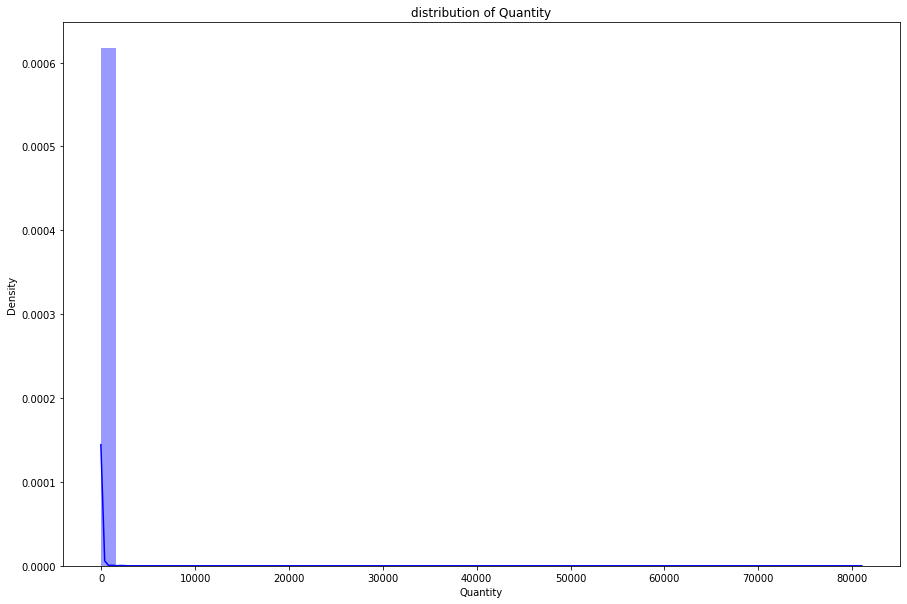

In [377]:
#distribution of Quantity
plt.figure(figsize=(15,10))
plt.title('distribution of Quantity')
sns.distplot(data['Quantity'],color="B")

Data distribution of quantity in negatively skeweed we need to normalse this distribution into symmentric to perforn better clusterring.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


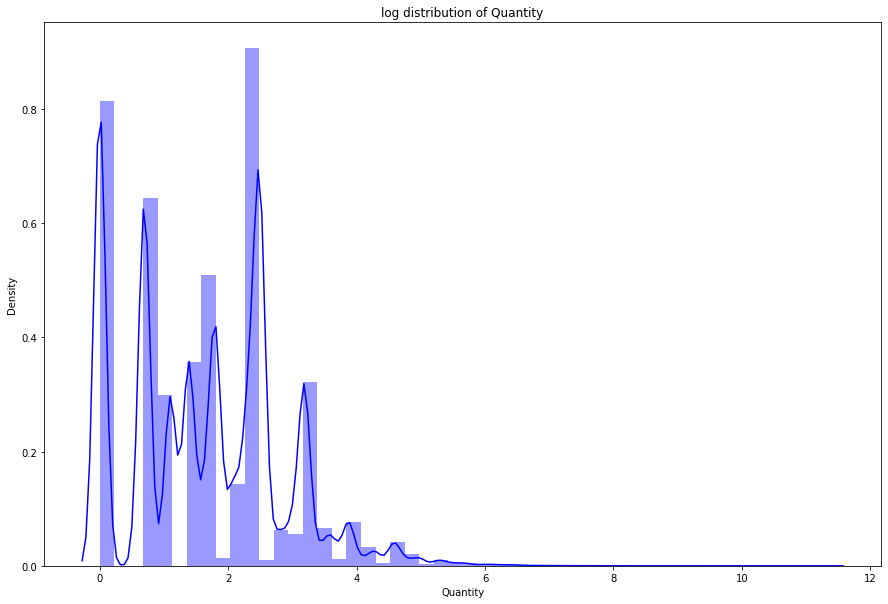

In [378]:
#applyning log traansformation over quantity
plt.figure(figsize=(15,10))
plt.title('log distribution of Quantity')
sns.distplot(np.log(data['Quantity']),color="B")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


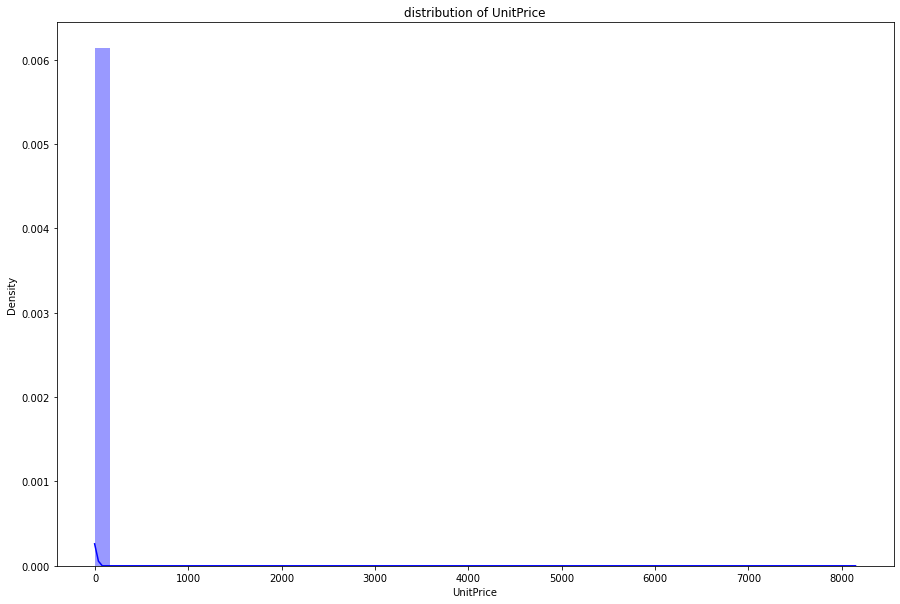

In [379]:
#distribution of unit price
plt.figure(figsize=(15,10))
plt.title('distribution of UnitPrice')
sns.distplot(data['UnitPrice'],color="B")

OUTLIER DETECTION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


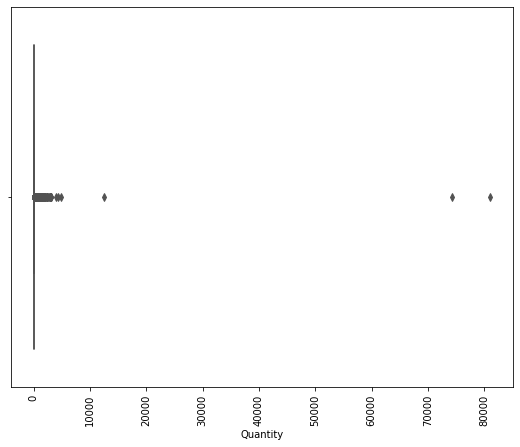

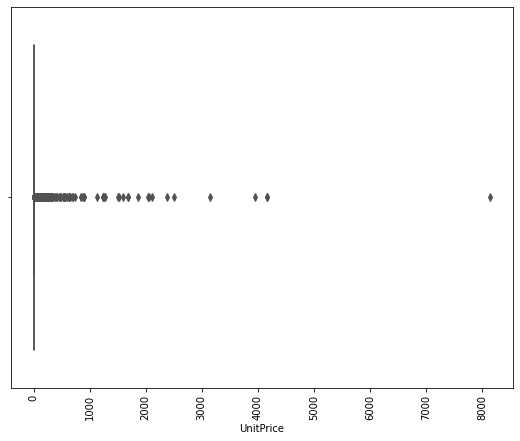

In [380]:
#creating function for visualizing outliers by boxplot
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(data[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)

There are soo many outliers present in unit price and Quantity we need to do some data transformation to deal with those outliers for that we scaled data by performing min max scaler.

In [381]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France,12,9,2011,Monday,3,12,37
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France,12,9,2011,Monday,3,12,37
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France,12,9,2011,Monday,3,12,37
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France,12,9,2011,Monday,3,12,37
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-09-12 12:50:00,4.95,12680,France,12,9,2011,Monday,3,12,37


## EXPLORATORY DATA ANALYSIS

In [382]:
#Exatract total amount spend my customer column by multiplying quantity and unitprice
data['TotalAmount']=data['Quantity']*data['UnitPrice']

In [383]:
data['TotalAmount'].max()

168469.6

## Top 10 most repeatedly sold items

In [384]:
# Top 10 most repeatedly sold items
data['Description'].value_counts()[:10]

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
LUNCH BAG RED RETROSPOT               1316
SET OF 3 CAKE TINS PANTRY DESIGN      1159
LUNCH BAG  BLACK SKULL.               1105
POSTAGE                               1099
PACK OF 72 RETROSPOT CAKE CASES       1068
Name: Description, dtype: int64

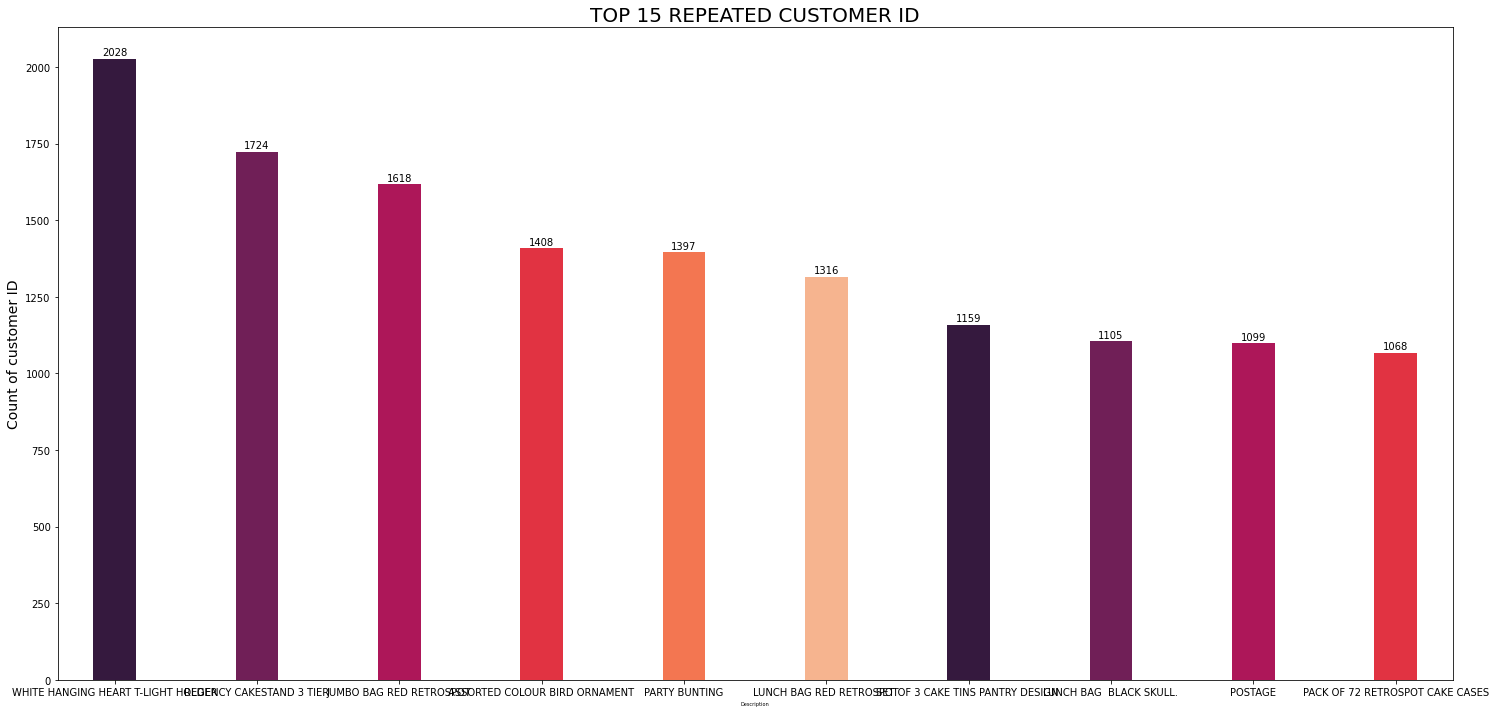

In [385]:
#barplot for agents and their bookings
Description = data['Description'].value_counts().head(10)
plt.figure(figsize=(25,12))
ax = Description.plot(kind = 'bar', rot=0, color=sns.color_palette('rocket'), width=0.3)
ax.set_title('TOP 15 REPEATED CUSTOMER ID', y=1, fontsize=20)
ax.set_xlabel('Description',fontsize=5)
ax.set_ylabel('Count of customer ID', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [386]:
most_revenue_generated_product=data.groupby('Description')['TotalAmount'].sum().sort_values(ascending=False).head(10)
most_revenue_generated_product.to_frame()

,TotalAmount
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142592.95
WHITE HANGING HEART T-LIGHT HOLDER,100448.15
JUMBO BAG RED RETROSPOT,85220.78
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
POSTAGE,77803.96
PARTY BUNTING,68844.33
ASSORTED COLOUR BIRD ORNAMENT,56580.34
Manual,53779.93


In [387]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34


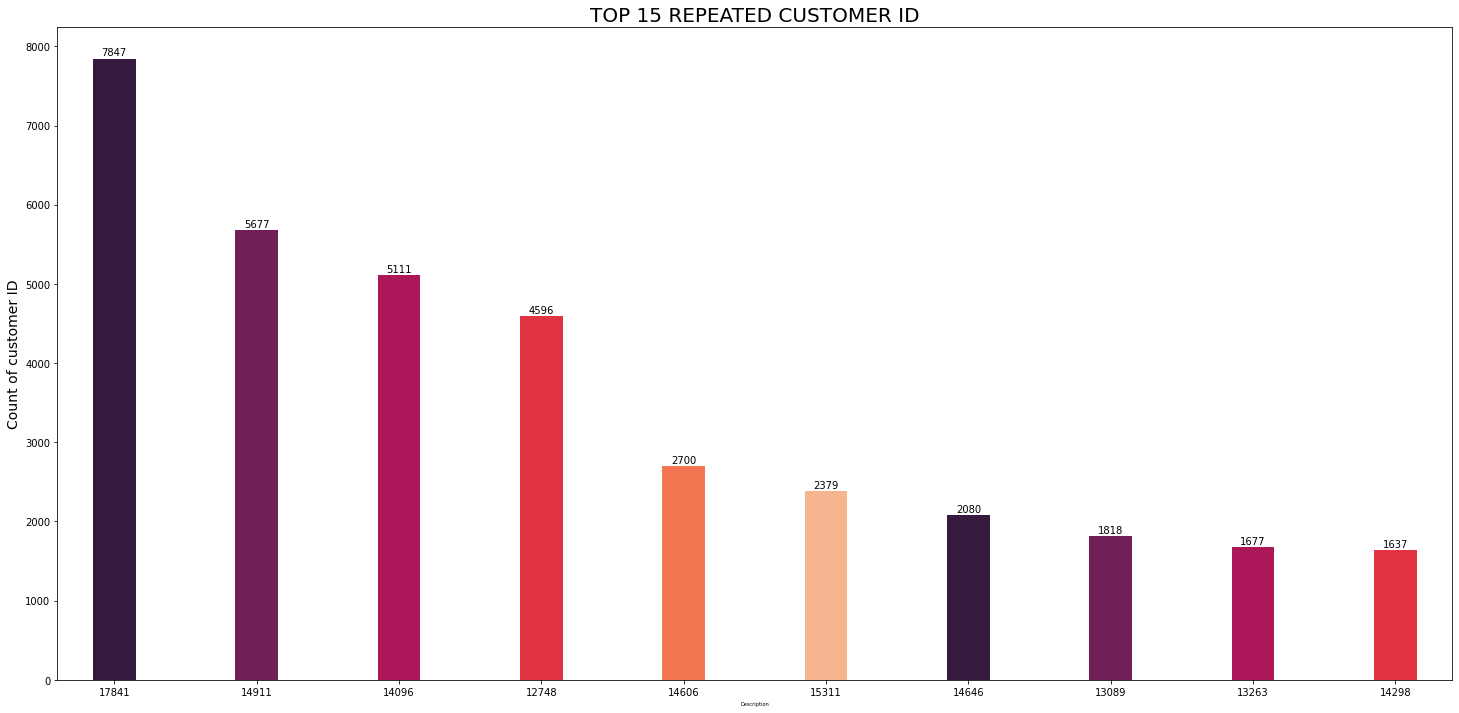

In [388]:
#barplot for agents and their bookings
CustomerID = data['CustomerID'].value_counts().head(10)
plt.figure(figsize=(25,12))
ax = CustomerID.plot(kind = 'bar', rot=0, color=sns.color_palette('rocket'), width=0.3)
ax.set_title('TOP 15 REPEATED CUSTOMER ID', y=1, fontsize=20)
ax.set_xlabel('Description',fontsize=5)
ax.set_ylabel('Count of customer ID', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [389]:
most_revenue_making_customer=data.groupby('CustomerID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
most_revenue_making_customer.to_frame()

,TotalAmount
CustomerID,
14646,280206.02
18102,259657.30
17450,194550.79
16446,168472.50
14911,143825.06
12415,124914.53
14156,117379.63
17511,91062.38
16029,81024.84


## Distribution of the Unit Price

Text(0.5, 1.0, 'UNIT PRICE DISTRIBUTION')

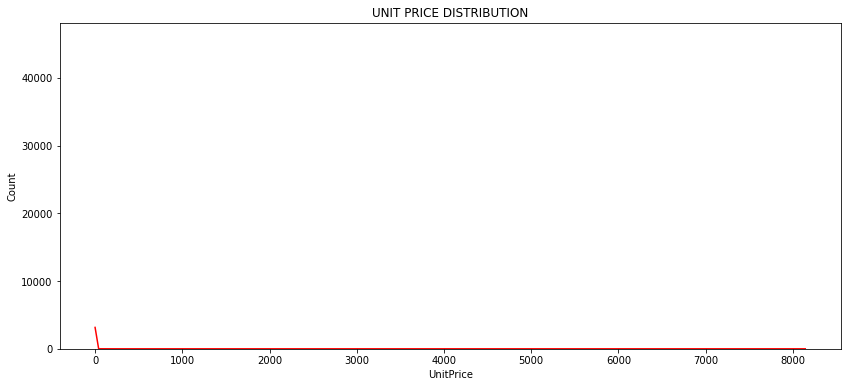

In [390]:
# Distribution of unit price
plt.figure(figsize = (14,6))
sns.histplot(data['UnitPrice'], kde=True,color='red')
plt.title('UNIT PRICE DISTRIBUTION')

## Customer who purchased most number of times

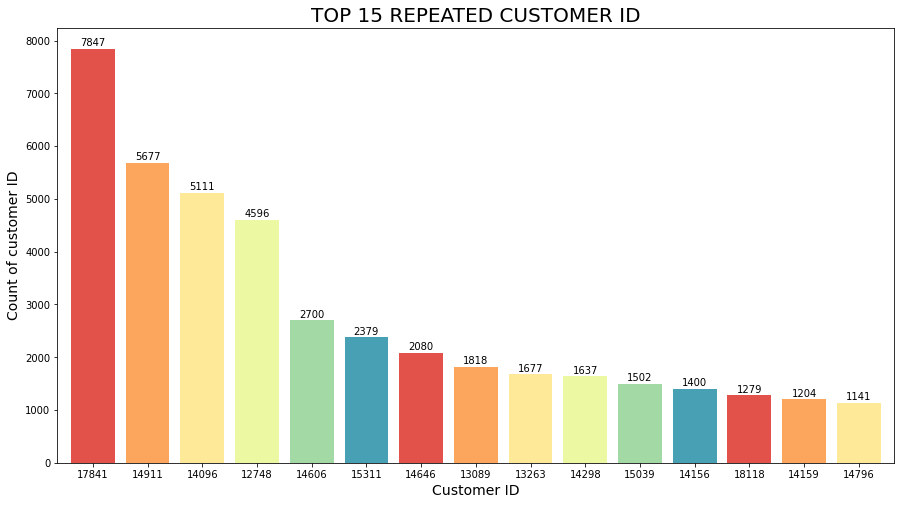

In [391]:
#barplot for agents and their bookings
customerid = data['CustomerID'].value_counts().head(15)
plt.figure(figsize=(15,8))
ax = customerid.plot(kind = 'bar', rot=0, color=sns.color_palette('Spectral'), width=0.8)
ax.set_title('TOP 15 REPEATED CUSTOMER ID', y=1, fontsize=20)
ax.set_xlabel('Customer ID', fontsize=14)
ax.set_ylabel('Count of customer ID', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

## Countries that were sold different items the most

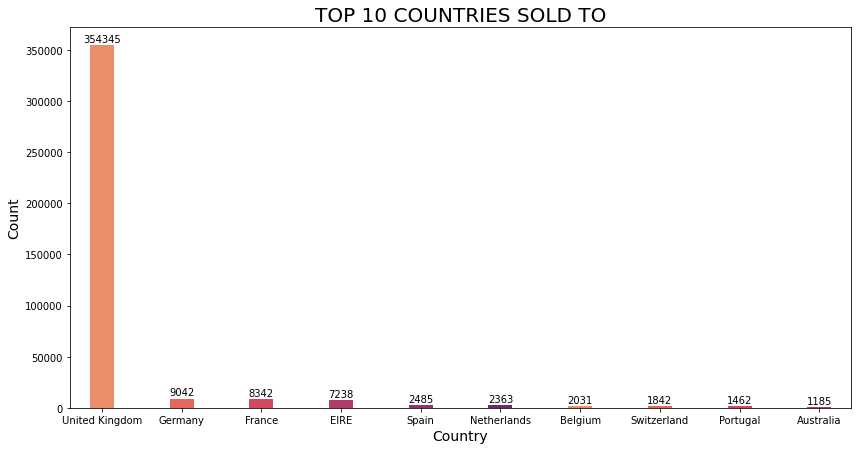

In [392]:
#barplot for agents and their bookings
Country = data['Country'].value_counts().head(10)
plt.figure(figsize=(14,7))
ax = Country.plot(kind = 'bar', rot=0, color=sns.color_palette('flare'), width=0.3)
ax.set_title('TOP 10 COUNTRIES SOLD TO', y=1, fontsize=20)
ax.set_xlabel('Country',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [393]:
high_sales_countries=data.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
high_sales_countries.to_frame()

,TotalAmount
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


In [394]:
data['Year'].value_counts()

2011    371764
2010     26160
Name: Year, dtype: int64

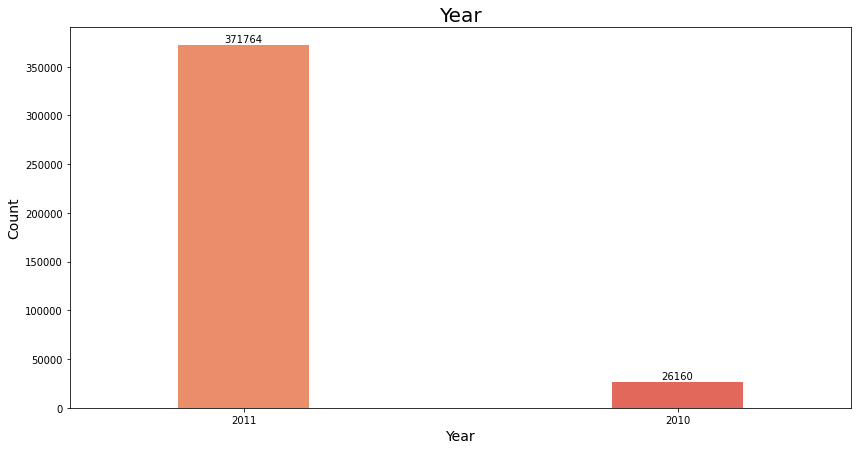

In [395]:
#barplot for agents and their bookings
year = data['Year'].value_counts()
plt.figure(figsize=(14,7))
ax = year.plot(kind = 'bar', rot=0, color=sns.color_palette('flare'), width=0.3)
ax.set_title('Year', y=1, fontsize=20)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [396]:
year_total_amount=data.groupby('Year')['TotalAmount'].sum().sort_values(ascending=False).head(10)
year_total_amount.to_frame()

,TotalAmount
Year,
2011,8338694.014
2010,572713.890


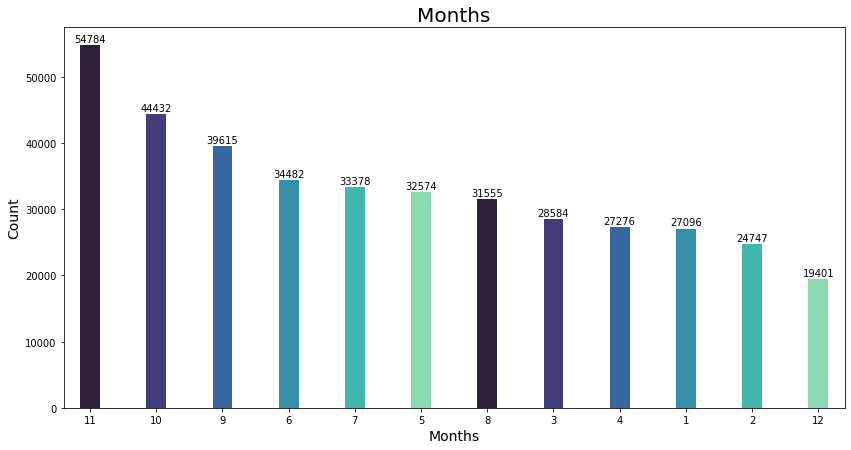

In [397]:
#barplot for agents and their bookings
Months = data['Month'].value_counts()
plt.figure(figsize=(14,7))
ax = Months.plot(kind = 'bar', rot=0, color=sns.color_palette('mako'), width=0.3)
ax.set_title('Months', y=1, fontsize=20)
ax.set_xlabel('Months',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [398]:
high_sales_month=data.groupby('Month')['TotalAmount'].sum().sort_values(ascending=False)
high_sales_month.to_frame()

,TotalAmount
Month,
9,1133388.772
11,1043411.070
10,938476.700
7,789246.351
5,751041.160
6,719777.200
3,670247.230
1,648181.090
8,647972.520


In [399]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34


Text(0.5, 1.0, 'adr for each month')

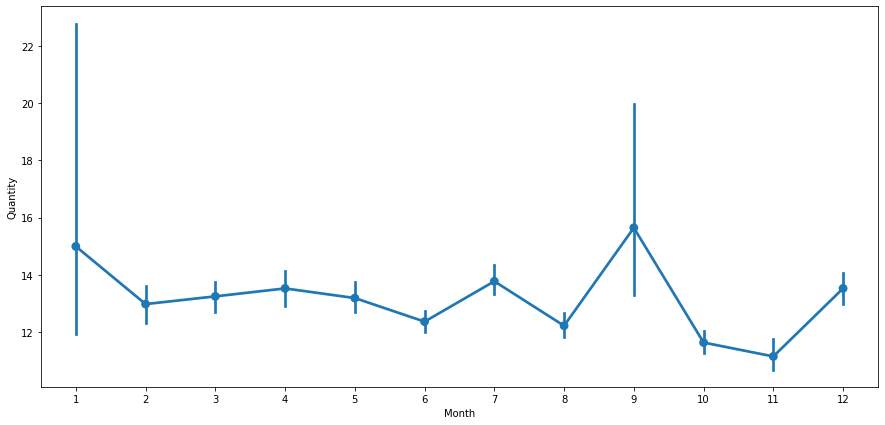

In [400]:
#lineplot for each month with respect to adr
plt.figure(figsize=(15,7))
sns.pointplot(x='Month', y='Quantity', data=data)
ax.set_title('adr for each month')

In [401]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [402]:
data['Time_type']=data['hour'].apply(time_type)

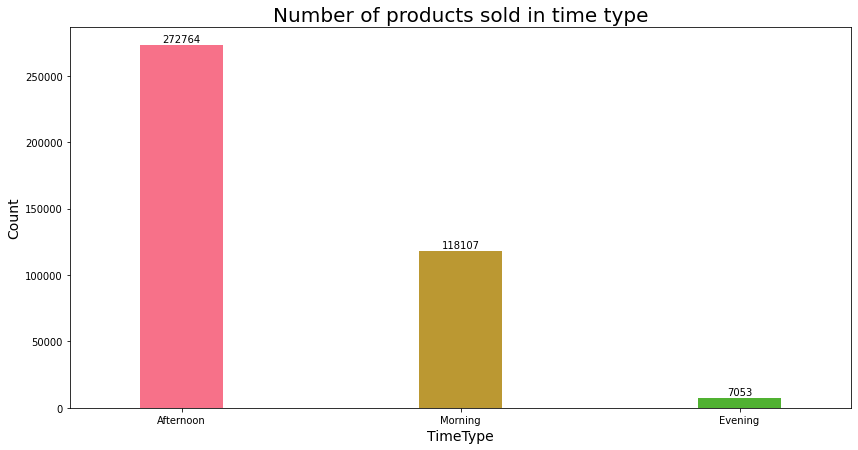

In [403]:
#barplot for agents and their bookings
TypeType = data['Time_type'].value_counts()
plt.figure(figsize=(14,7))
ax = TypeType.plot(kind = 'bar', rot=0, color=sns.color_palette('husl'), width=0.3)
ax.set_title('Number of products sold in time type', y=1, fontsize=20)
ax.set_xlabel('TimeType',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [404]:
high_sales_month=data.groupby('Time_type')['TotalAmount'].sum().sort_values(ascending=False)
high_sales_month.to_frame()

,TotalAmount
Time_type,
Afternoon,5216956.672
Morning,3521535.582
Evening,172915.650


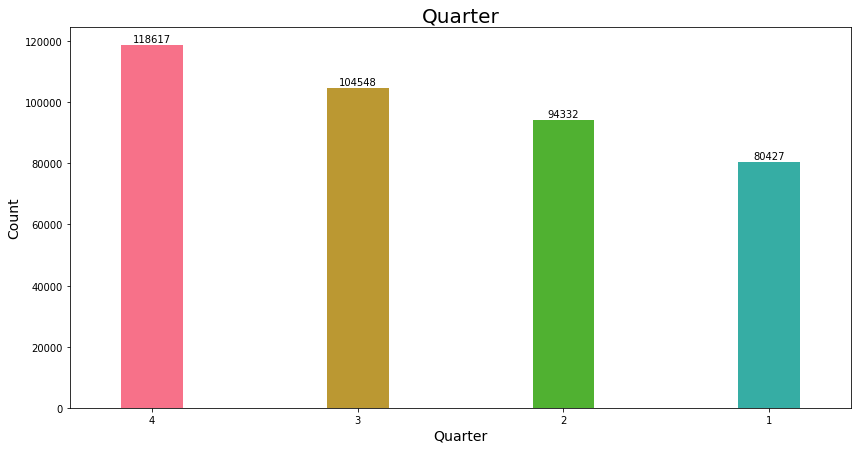

In [405]:
#barplot for agents and their bookings
Quarter = data['Quarter'].value_counts()
plt.figure(figsize=(14,7))
ax = Quarter.plot(kind = 'bar', rot=0, color=sns.color_palette('husl'), width=0.3)
ax.set_title('Quarter', y=1, fontsize=20)
ax.set_xlabel('Quarter',fontsize=14)
ax.set_ylabel('Count', fontsize=14)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')
plt.show()

In [406]:
high_sales_month=data.groupby('Quarter')['TotalAmount'].sum().sort_values(ascending=False)
high_sales_month.to_frame()

,TotalAmount
Quarter,
3,2570607.643
4,2414264.180
2,2073690.601
1,1852845.480


In [407]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Day,Month,Year,day_name,Quarter,hour,week,TotalAmount,Time_type
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,15.30,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,22.00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,12,1,2010,Tuesday,1,8,2,20.34,Morning


In [408]:
# Top 10 items sold in terms of quantity
item_quantity_10 = data.groupby('Description').sum()['Quantity'].sort_values(ascending = False)[:10]

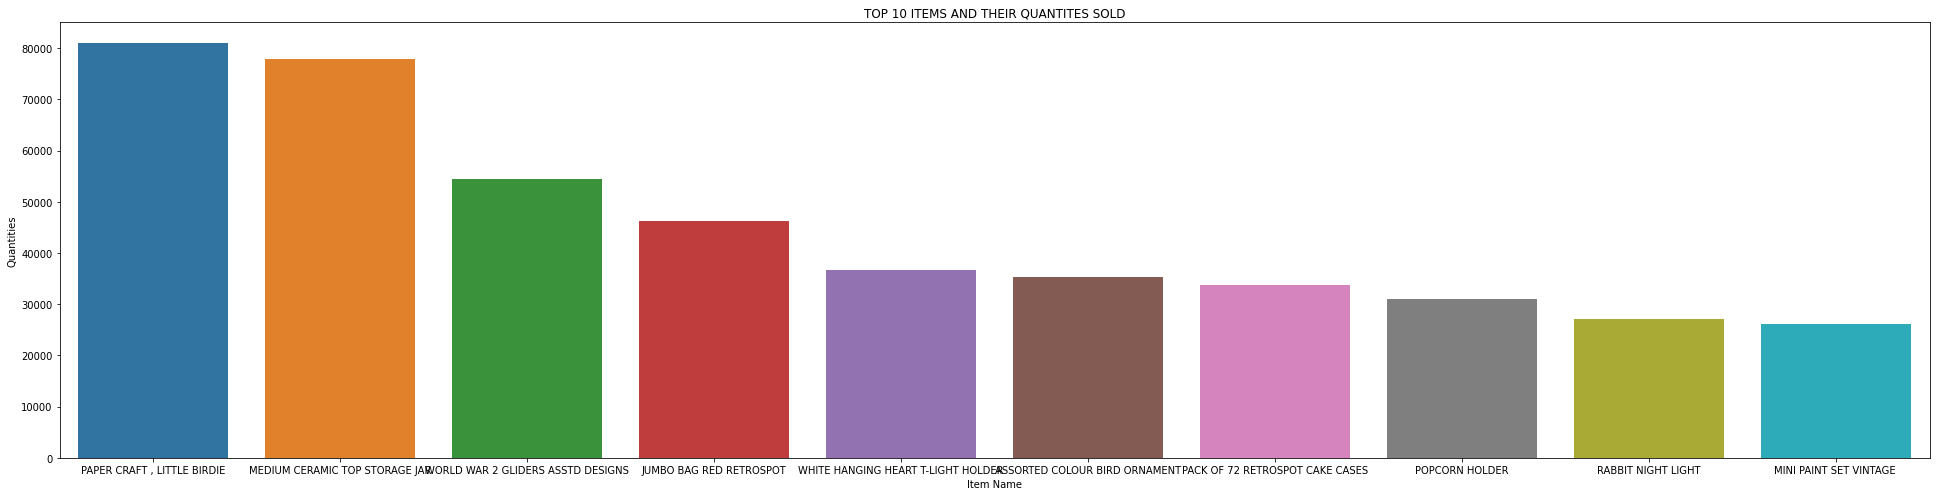

In [409]:
# Barplot of top 10 items sold in terms of quantity
plt.figure(figsize = (27,7))
sns.barplot(x = item_quantity_10.index, y = item_quantity_10.values)
plt.xlabel('Item Name')
plt.ylabel('Quantities')
plt.title('TOP 10 ITEMS AND THEIR QUANTITES SOLD')
plt.tight_layout()

Text(0.5, 1.0, 'CORRELTAION MATRIX')

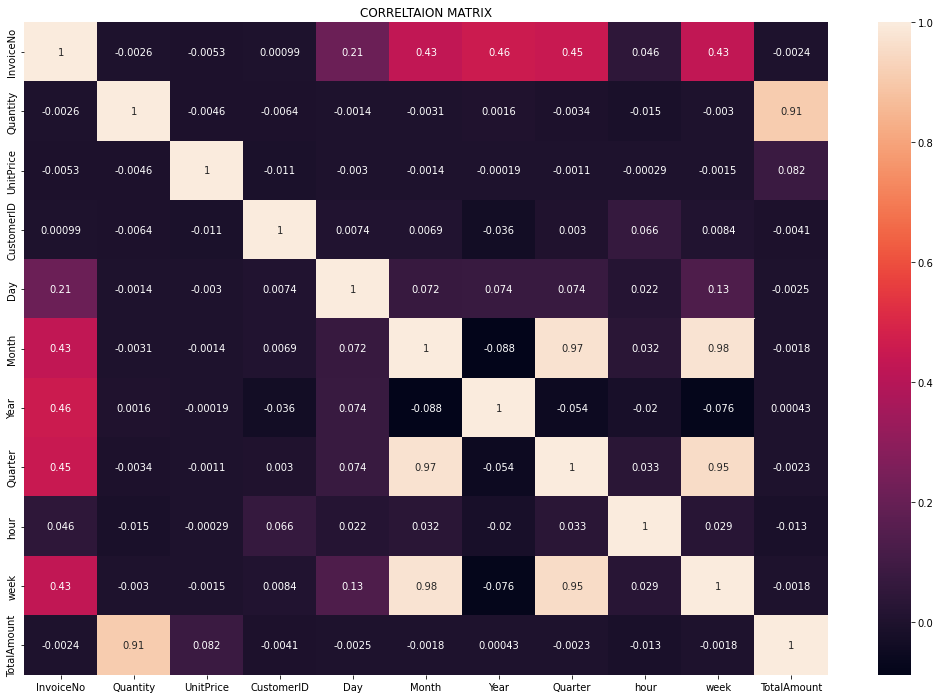

In [410]:
# Correlation between various columns
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


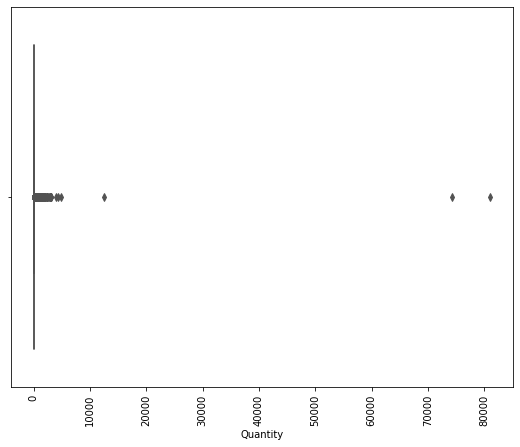

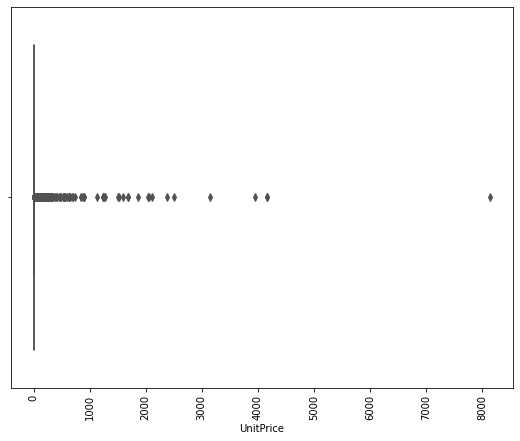

In [411]:
#creating function for visualizing outliers by boxplot
def drawplot(col):
   plt.figure(figsize=(9,7))
   sns.boxplot(data[col],palette='plasma')
   plt.xticks(rotation='vertical')

toview=['Quantity','UnitPrice']
for col in toview:
    drawplot(col)

DATA TRANSFORMATION

In [412]:
# Most recent date in the dataset
last_invoice_date = max(data['InvoiceDate'])

In [413]:
last_invoice_date

Timestamp('2011-12-10 17:19:00')

In [414]:
import datetime as dt

In [415]:
Latest_Date = dt.datetime(2011,12,11)

In [416]:
# Creating a dataframe to find the most recent purchase
recency_df = pd.DataFrame(data.groupby('CustomerID').max()['InvoiceDate'], columns = ['InvoiceDate'])
recency_df.reset_index(inplace = True)

In [417]:
# Calculating days from most recent purchase
recency_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date - x).days)
recency_df = recency_df.loc[: , ['CustomerID', 'Recency']]

In [418]:
recency_df.head()

,CustomerID,Recency
0,12346,326
1,12347,40
2,12348,76
3,12349,19
4,12350,311


FREQUENCY

In [419]:
# Creating a frequency dataframe
freq_df = pd.DataFrame(data = data.groupby('CustomerID').nunique()['InvoiceNo'])
freq_df.reset_index(inplace = True)
freq_df.columns = ['CustomerID', 'Frequency']

In [420]:
freq_df.head()

,CustomerID,Frequency
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


MONETORY

In [421]:
# Creating a dataframe with total billed amount
monetary_df = data.loc[:,['CustomerID', 'Quantity', 'UnitPrice']]
monetary_df['TotalAmount'] = monetary_df.loc[:,'Quantity'] * monetary_df.loc[:,'UnitPrice']

In [422]:
# Grouping by customer ID to find total billed amount per customer
monetary_df = pd.DataFrame(monetary_df.groupby('CustomerID').sum()['TotalAmount'])
monetary_df.reset_index(inplace = True)
monetary_df.columns = ['CustomerID', 'Monetary']

In [423]:
monetary_df.head()

,CustomerID,Monetary
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [424]:
# Merging 3 dataframes to form an RFM dataframe
rec_fre = recency_df.merge(freq_df, on = 'CustomerID' )
rfm_df = rec_fre.merge(monetary_df, on = 'CustomerID')

In [425]:
# First 5 rows of the RFM dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,40,7,4310.00
2,12348,76,4,1797.24
3,12349,19,1,1757.55
4,12350,311,1,334.40


In [426]:
# Information of the RFM dataframe
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   int64  
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 169.5 KB


In [427]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles =quantiles.to_dict()

In [428]:
quantiles

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 307.245, 0.5: 674.45, 0.75: 1661.64},
 'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 161.5}}

In [429]:
#Functions to createR,PandMsegments
def RScoring(x,p,d):
    if x <= d[p][0.25] :
         return 1
    elif x <= d[p][0.50] :
        return 2
    elif x <= d[p][0.75] :
        return 3
    else :
        return 4
def FnMScoring(x,p,d):
    if x <= d[p][0.25] :
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1                                

In [436]:
rfm_df['R']=rfm_df['Recency'].apply(RScoring , args = ('Recency',quantiles,))
rfm_df['F']=rfm_df['Frequency'].apply(FnMScoring , args = ('Frequency',quantiles,))
rfm_df['M']=rfm_df['Monetary'].apply(FnMScoring , args = ('Monetary',quantiles,))

In [437]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346,326,1,77183.60,4,4,1,441,9
1,12347,40,7,4310.00,2,1,1,211,4
2,12348,76,4,1797.24,3,2,1,321,6
3,12349,19,1,1757.55,1,4,1,141,6
4,12350,311,1,334.40,4,4,3,443,11


In [438]:
#Calculate and Add RPMGroup value column showing combined concatenated score of RPM
rfm_df['RFMGroup']=rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore']=rfm_df[['R','F','M']].sum(axis=1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
0,12346,326,1,77183.60,4,4,1,441,9
1,12347,40,7,4310.00,2,1,1,211,4
2,12348,76,4,1797.24,3,2,1,321,6
3,12349,19,1,1757.55,1,4,1,141,6
4,12350,311,1,334.40,4,4,3,443,11


In [439]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,105.430053,4.271952,2053.793018,2.485135,2.680111,2.500115,7.665361
std,1721.889758,115.075862,7.705493,8988.248381,1.125564,1.143869,1.118266,2.862779
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,13812.500000,22.000000,1.000000,307.245000,1.000000,2.000000,1.500000,5.000000
50%,15299.000000,61.000000,2.000000,674.450000,2.000000,3.000000,3.000000,8.000000
75%,16778.500000,161.500000,5.000000,1661.640000,3.500000,4.000000,3.500000,10.000000
max,18287.000000,697.000000,210.000000,280206.020000,4.000000,4.000000,4.000000,12.000000


In [ ]:
rfm_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFMGroup', 'RFMScore'],
      dtype='object')

In [440]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


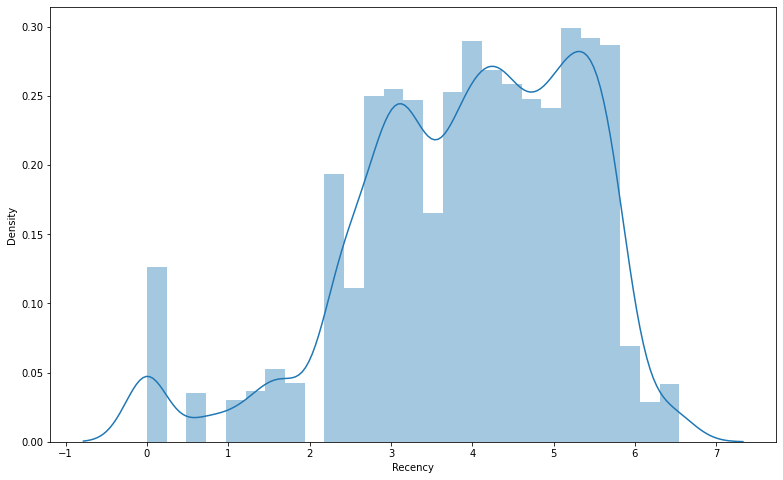

In [441]:

#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

In [442]:
# Number of unique customer ID in the original dataframe
data['CustomerID'].nunique()

4339

In [443]:
# Number of unique customer ID in the original dataframe
data['CustomerID'].nunique()

4339

In [444]:
# Making the customer ID the index of the dataframe
rfm_df.set_index('CustomerID', inplace= True)

In [445]:
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346,326,1,77183.60,4,4,1,441,9
12347,40,7,4310.00,2,1,1,211,4
12348,76,4,1797.24,3,2,1,321,6
12349,19,1,1757.55,1,4,1,141,6
12350,311,1,334.40,4,4,3,443,11


In [446]:
# Statistical Description of the RFM dataset
rfm_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,105.447108,4.271952,2053.793248,2.485135,2.680111,2.500115,7.665361
std,115.060305,7.705493,8988.248329,1.125564,1.143869,1.118266,2.862779
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,22.000000,1.000000,307.245000,1.000000,2.000000,1.500000,5.000000
50%,61.000000,2.000000,674.450000,2.000000,3.000000,3.000000,8.000000
75%,161.500000,5.000000,1661.640000,3.500000,4.000000,3.500000,10.000000
max,697.000000,210.000000,280206.020000,4.000000,4.000000,4.000000,12.000000


In [447]:
# Importing the scaler
from sklearn.preprocessing import StandardScaler, Normalizer


In [449]:
rfm_df_copy=rfm_df.copy()

['CustomerID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFMGroup', 'RFMScore']

In [450]:
# Scaling the dataframe
scaler = StandardScaler()
normal = Normalizer()
scaled_data = scaler.fit_transform(rfm_df_copy)
scaled_data = normal.fit_transform(scaled_data)
rfm_scaled = pd.DataFrame(scaled_data)
rfm_scaled.set_index(rfm_df_copy.index, inplace=True)

In [451]:
# First 5 rows of the scaled data
rfm_scaled.head()

,0,1,2,3,4,5,6,7
CustomerID,,,,,,,,
12346,0.213312,-0.047254,0.930177,0.149772,0.128407,-0.149282,0.152118,0.051881
12347,-0.221289,0.137736,0.097656,-0.167682,-0.571421,-0.521884,-0.217739,-0.498108
12348,-0.150309,-0.020728,-0.016764,0.268652,-0.349197,-0.787856,0.212458,-0.341655
12349,-0.278656,-0.157489,-0.012224,-0.489372,0.427961,-0.497534,-0.425056,-0.215756
12350,0.564300,-0.134128,-0.060424,0.425124,0.364480,0.141201,0.437073,0.367937


CLUSTERING

In [454]:
X = rfm_scaled.iloc[:, 0:3].values 

In [455]:
X[:5]

array([[ 0.21331206, -0.04725358,  0.93017654],
       [-0.22128875,  0.13773553,  0.09765584],
       [-0.15030883, -0.02072809, -0.0167637 ],
       [-0.27865583, -0.15748881, -0.01222409],
       [ 0.56430029, -0.13412777, -0.0604244 ]])

In [461]:
from sklearn.decomposition import PCA

In [462]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (4339, 3)
transformed shape: (4339, 2)


In [463]:
pca.components_

array([[ 0.99118341, -0.12886167, -0.03082398],
       [ 0.1299067 ,  0.89936706,  0.41744837]])

In [464]:
X_pca

array([[ 0.23620981,  0.4477235 ],
       [-0.19273571,  0.21010464],
       [-0.09843484,  0.0290442 ],
       ...,
       [ 0.40402115, -0.00718306],
       [-0.23180048,  0.42039169],
       [-0.26084352, -0.02285645]])

In [465]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [475]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

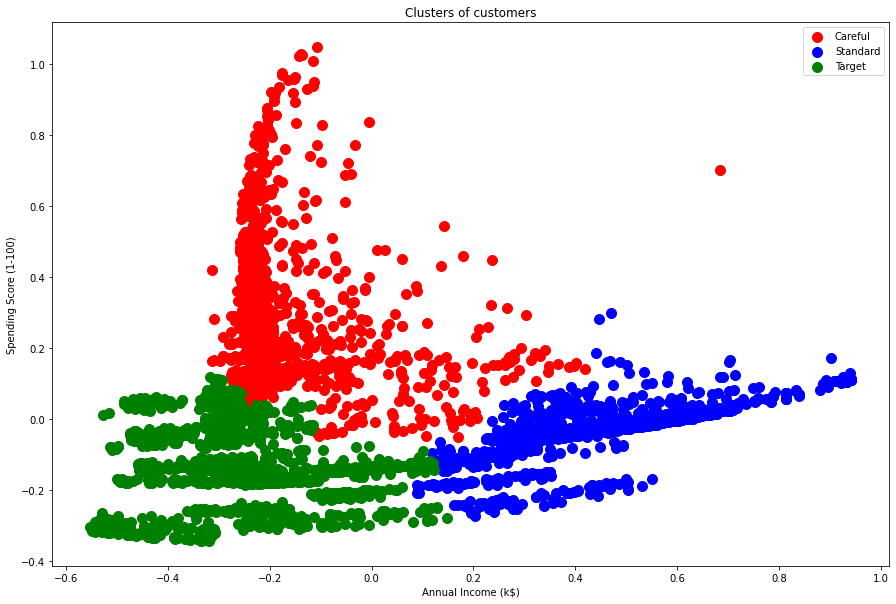

In [476]:
# Visualizing the clusters (two dimensions only)
plt.scatter(X_pca[y_hc == 0, 0], X_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X_pca[y_hc == 1, 0], X_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X_pca[y_hc == 2, 0], X_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [482]:
# Importing libraries necessary for clustering
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score

In [483]:
# Creating an instance of the model
kmeans = KMeans()

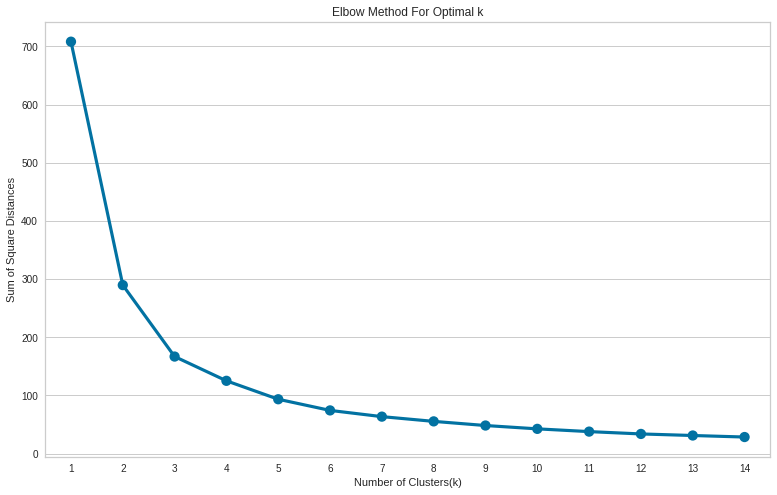

In [514]:
from sklearn.cluster import KMeans

plt.figure(figsize=(13,8))
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X_pca)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Silhouette Analysis

In [487]:
# Creating a function to calculate silhouette scores
def sil_score(input, k):
  ''' Returns a dataframe with sillhouette scores of different clusters in the data '''
  
  sil_df = pd.DataFrame(columns = ['Clusters', 'Silhouette Score'])
  
  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(input)
    score = silhouette_score(input, labels)
    sil_df = sil_df.append({'Clusters' : i,
                            'Silhouette Score' : score}, ignore_index = True)
  
  return sil_df

In [488]:
# Using the function to display silhoutte scores at different number of clusters
sil_score(X_pca,10)

,Clusters,Silhouette Score
0,2.0,0.558845
1,3.0,0.531038
2,4.0,0.478336
3,5.0,0.446346
4,6.0,0.434676
5,7.0,0.413566
6,8.0,0.394094
7,9.0,0.407513
8,10.0,0.403664


In [489]:
# Creating a function for silhouette plot visualization
def sil_visual(input, k):
  ''' Visualize the silhouette plot with different clusters'''

  for i in range(2,k+1):
    kmeans = KMeans(n_clusters = i)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(input)
    visualizer.poof()

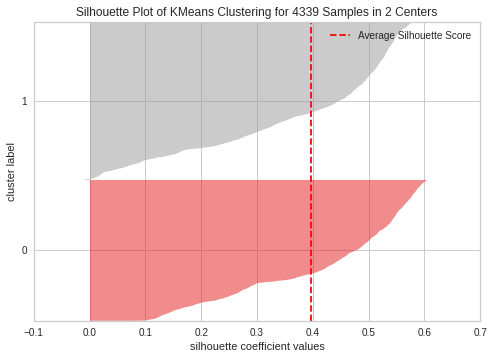

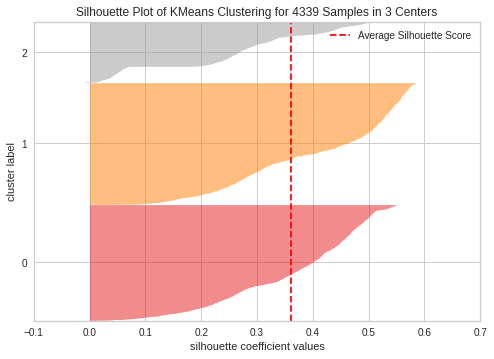

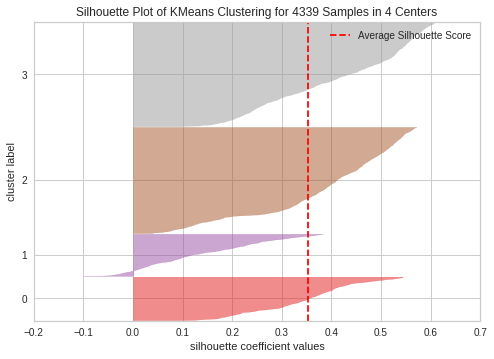

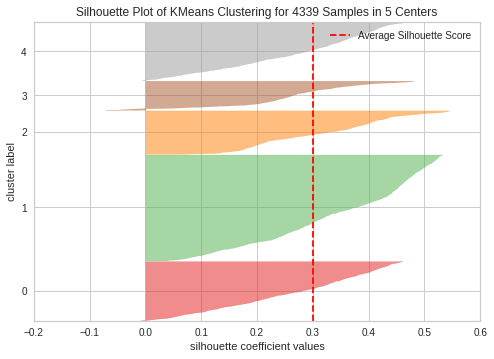

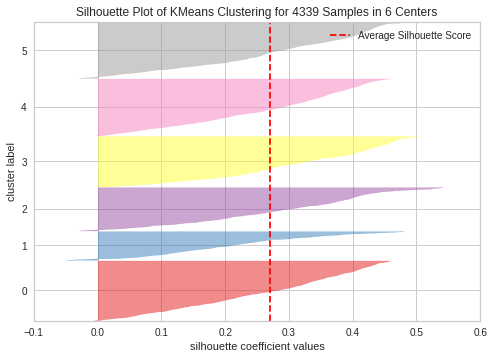

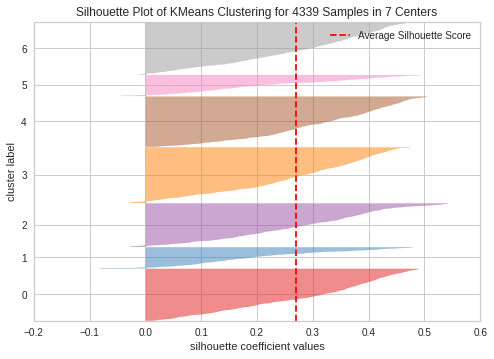

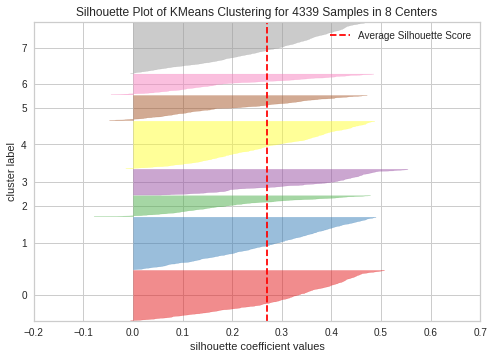

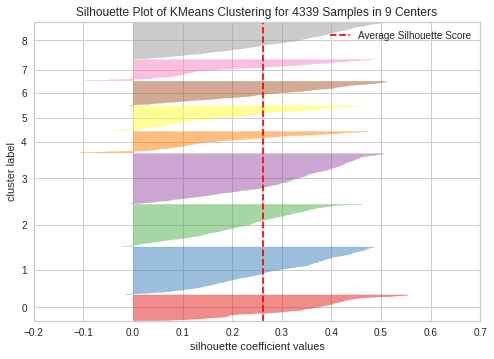

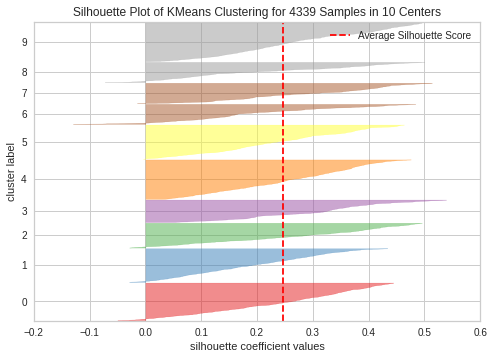

In [ ]:
# Applying the silhouette visualization function for different clusters.
sil_visual(rfm_scaled, 10)

Building the KMeans Model

In [490]:
# KMeans with 3 clusters
kmeans = KMeans(n_clusters = 3, random_state=0)

In [491]:
# Fitting the model to the data
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=0)

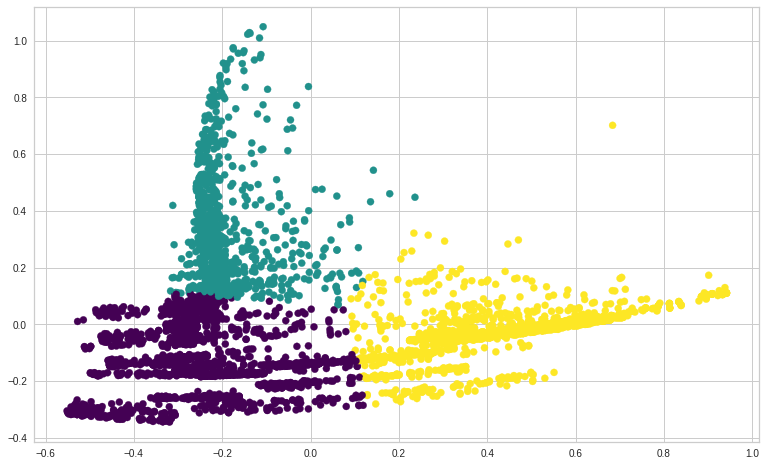

In [496]:
# Creating cluster labels for the data and appending it to the RFM dataframe
plt.figure(figsize=(13,8))
labels = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
            s=50, cmap='viridis')

## DB SCAN

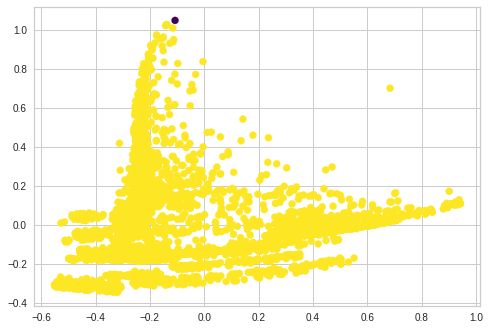

In [512]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
y_db = DBSCAN(eps=0.5, min_samples=1000)
y_db=y_db.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_db,
            s=50, cmap='viridis')



